<a href="https://colab.research.google.com/github/lmcanavals/ml/blob/main/1201_semisupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist as fm
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fm.load_data()

4422102/4422102 [==============================] - 0s 0us/step


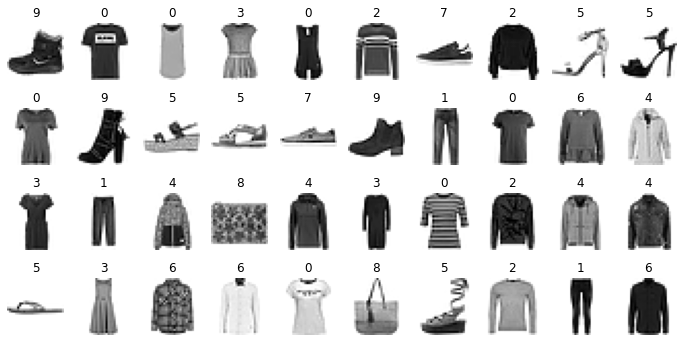

In [3]:
fig = plt.figure(figsize=(12, 6))
for i, im in enumerate(x_train[:40]):
    a = fig.add_subplot(4, 10, i + 1)
    plt.axis('off')
    plt.imshow(im, cmap='gray_r')
    plt.title(y_train[i])
plt.show()

In [4]:
x_train = x_train / 255.
x_test = x_test / 255.

In [5]:
m, r, c = x_train.shape
x_train = x_train.reshape((m, r*c))
m, r, c = x_test.shape
x_test = x_test.reshape((m, r*c))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=r*c, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train[:50], y_train[:50], epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 9ms/step - loss: 2.4790 - accuracy: 0.1600
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 2.2136 - accuracy: 0.1800
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 2.1004 - accuracy: 0.2200
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 2.0770 - accuracy: 0.2000
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 1.9599 - accuracy: 0.2200
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 1.8704 - accuracy: 0.3600
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 1.8241 - accuracy: 0.3000
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 1.7352 - accuracy: 0.4400
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 1.6921 - accuracy: 0.4800
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 1.6356 - accuracy: 0.5200


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.7706 - accuracy: 0.3633


[1.770625352859497, 0.36329999566078186]

In [9]:
from sklearn.cluster import KMeans

In [10]:
k = 50
kmeans = KMeans(n_clusters=k)
x_digits_dist = kmeans.fit_transform(x_train)
representative_digit_idx = np.argmin(x_digits_dist, axis=0)
x_representative_digits = x_train[representative_digit_idx]

In [13]:
y_rd = y_train[representative_digit_idx]

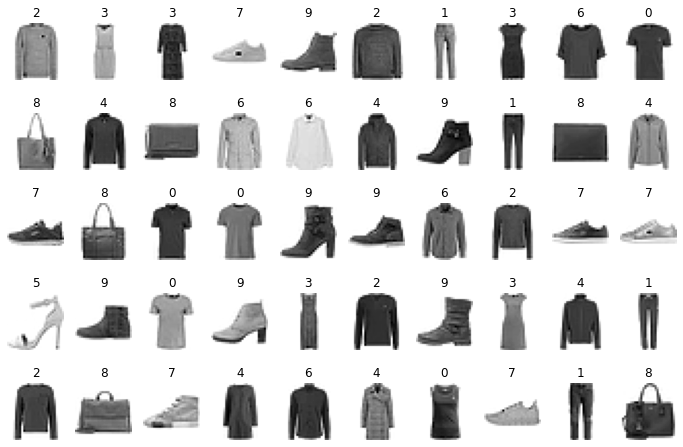

In [14]:
fig = plt.figure(figsize=(12, 8))
for i, im in enumerate(x_representative_digits):
    a = fig.add_subplot(5, 10, i + 1)
    plt.axis('off')
    plt.imshow(im.reshape((28, 28)), cmap='gray_r')
    plt.title(y_rd[i])
plt.show()

In [17]:
model = keras.Sequential(
    [layers.Dense(64, input_dim=r*c, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(128, activation='relu'),
     layers.Dropout(0.25),
     layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_representative_digits, y_rd, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 11ms/step - loss: 2.4515 - accuracy: 0.0600
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 2.2320 - accuracy: 0.2600
Epoch 3/10
2/2 [==============================] - 0s 14ms/step - loss: 2.1727 - accuracy: 0.2600
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 2.0546 - accuracy: 0.3200
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 2.0372 - accuracy: 0.3400
Epoch 6/10
2/2 [==============================] - 0s 10ms/step - loss: 1.8902 - accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 1.7909 - accuracy: 0.4000
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 1.7547 - accuracy: 0.4400
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 1.6629 - accuracy: 0.5200
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 1.5710 - accuracy: 0.4600


In [18]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.7026 - accuracy: 0.4895


[1.7025624513626099, 0.4894999861717224]